In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Dataset
DATA_PATH = r"C:\Users\Batia\Downloads\RetailRocket rec sys"
df = pd.read_csv(os.path.join(DATA_PATH, "train_retailrocket.csv"))

# Show basic info
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880087 entries, 0 to 1880086
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp_x    int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
 5   timestamp_y    float64
 6   property       object 
 7   value          object 
 8   timestamp      object 
dtypes: float64(2), int64(3), object(4)
memory usage: 129.1+ MB
None
     timestamp_x  visitorid event  itemid  transactionid   timestamp_y  \
0  1433221332117     257597  view  355908            NaN  1.442113e+12   
1  1433224214164     992329  view  248676            NaN  1.442113e+12   
2  1433221999827     111016  view  318965            NaN           NaN   
3  1433221955914     483717  view  253185            NaN  1.439694e+12   
4  1433221337106     951259  view  367447            NaN  1.442113e+12   

  property                                              value  \
0

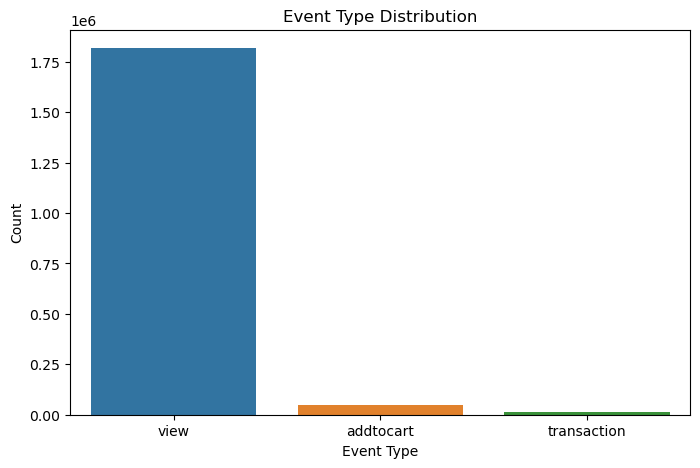

In [2]:
plt.figure(figsize=(8, 5))
sns.countplot(x="event", data=df, order=df["event"].value_counts().index)
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()


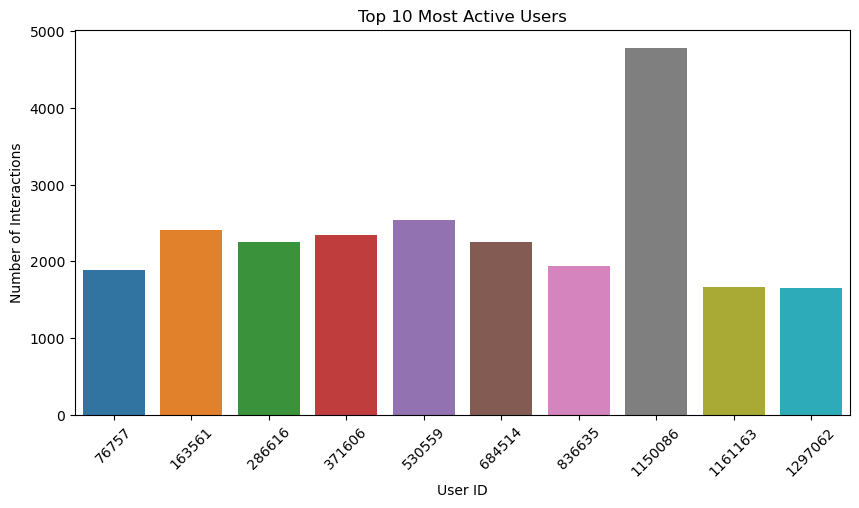

In [3]:
top_users = df["visitorid"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index, y=top_users.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Interactions")
plt.show()


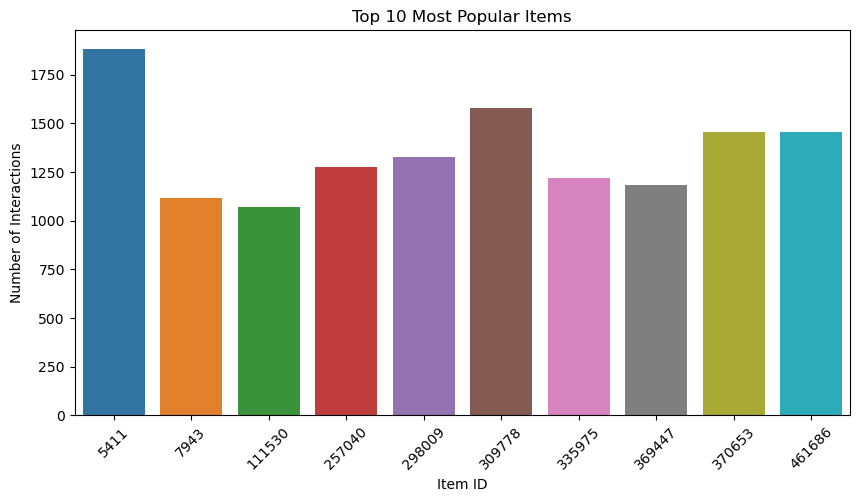

In [4]:
top_items = df["itemid"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_items.index, y=top_items.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Items")
plt.xlabel("Item ID")
plt.ylabel("Number of Interactions")
plt.show()


In [5]:
num_users = df["visitorid"].nunique()
num_items = df["itemid"].nunique()
total_interactions = len(df)

sparsity = 1 - (total_interactions / (num_users * num_items))
print(f"🔍 Dataset Sparsity: {sparsity:.6f}")


🔍 Dataset Sparsity: 0.999990


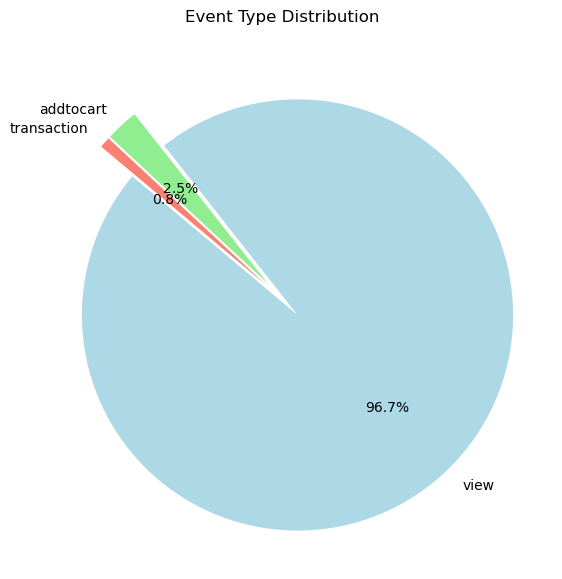

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Event Type Distribution - Pie Chart
event_counts = df["event"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140, explode=[0.1, 0.1, 0.1], colors=['lightblue', 'lightgreen', 'salmon'])
plt.title("Event Type Distribution")
plt.show()



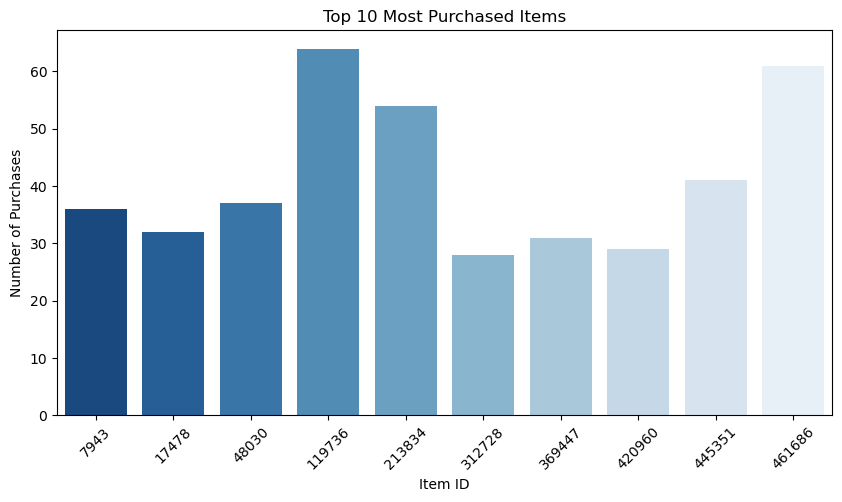

In [14]:
top_purchased_items = df[df["event"] == "transaction"]["itemid"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_purchased_items.index, y=top_purchased_items.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Most Purchased Items")
plt.xlabel("Item ID")
plt.ylabel("Number of Purchases")
plt.show()

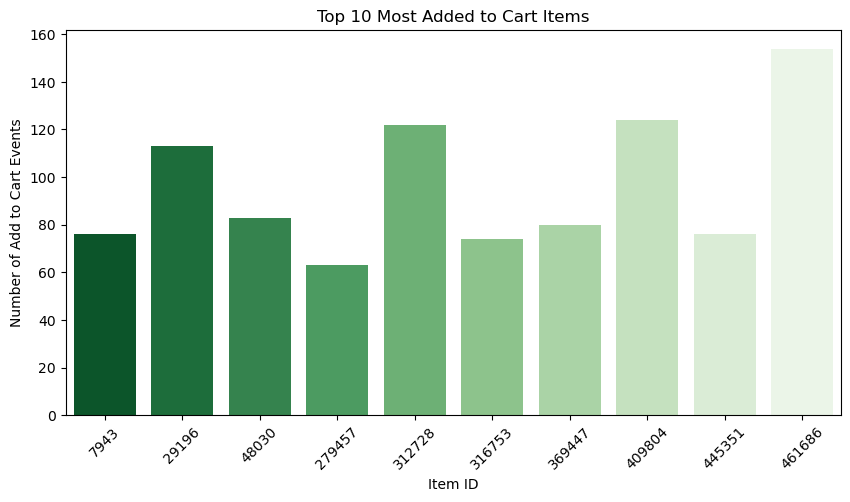

In [13]:
top_cart_items = df[df["event"] == "addtocart"]["itemid"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cart_items.index, y=top_cart_items.values, palette="Greens_r")
plt.xticks(rotation=45)
plt.title("Top 10 Most Added to Cart Items")
plt.xlabel("Item ID")
plt.ylabel("Number of Add to Cart Events")
plt.show()

<Figure size 1200x600 with 0 Axes>

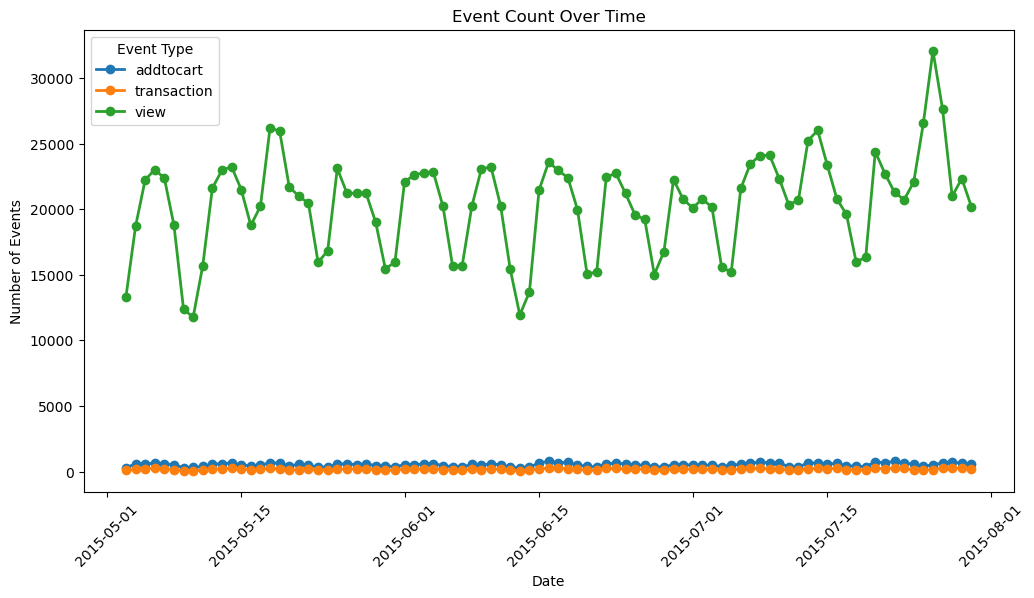

In [10]:
# Convert timestamp column to datetime format if not already
if df["timestamp"].dtype != 'datetime64[ns]':
	df["timestamp"] = pd.to_datetime(df["timestamp"])

# Aggregate events over time (daily count)
df["date"] = df["timestamp"].dt.date
event_time_series = df.groupby(["date", "event"]).size().unstack().fillna(0)

# Plot Events Over Time
plt.figure(figsize=(12, 6))
event_time_series.plot(kind="line", marker="o", linewidth=2, figsize=(12, 6))
plt.title("Event Count Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.legend(title="Event Type")
plt.show()


<Figure size 1200x600 with 0 Axes>

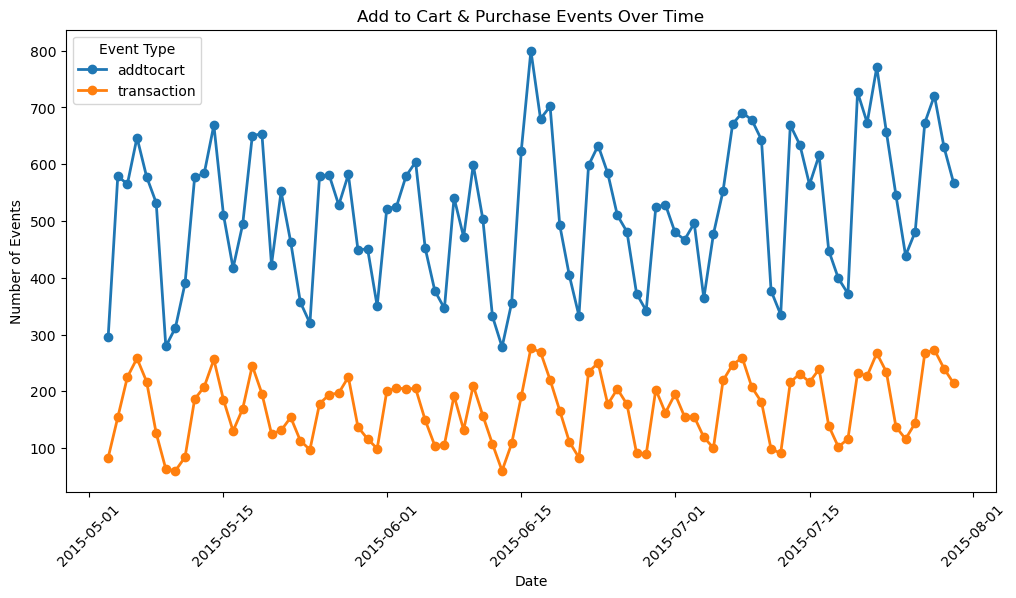

In [12]:
# Filter only 'addtocart' and 'transaction' events
filtered_events = df[df["event"].isin(["addtocart", "transaction"])]

# Aggregate event counts over time
event_time_series_filtered = filtered_events.groupby(["date", "event"]).size().unstack().fillna(0)

# Plot Events Over Time (Only for Add to Cart and Purchases)
plt.figure(figsize=(12, 6))
event_time_series_filtered.plot(kind="line", marker="o", linewidth=2, figsize=(12, 6))
plt.title("Add to Cart & Purchase Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.legend(title="Event Type")
plt.show()
